# Stackoverflow 2019 Survey results analysis and insights extraction about OSS contributions
This project follows the [CRISP-DM](https://www.datasciencecentral.com/profiles/blogs/crisp-dm-a-standard-methodology-to-ensure-a-good-outcome) process to answer the followig questions:
   - How often do developers contribute to OSS?
   - Do Hobyist developers contribute more often to OSS?
   - Does OSS quality perception play a bias role towards OSS contribution?
   - Are experienced developers contributing more frequently to OSS?
   - Do developers contributing to the OSS have a higher income?

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import utils

# 1. Data understanding

In [2]:
df = pd.read_csv("../data/so_survey_2019/survey_results_public.csv")
schema = pd.read_csv("../data/so_survey_2019/survey_results_schema.csv")
eu_countries = pd.read_csv("../data/listofeucountries.csv")
df.shape

(88883, 85)

In [3]:
schema.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open sour...


In [4]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [5]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [6]:
df['DevType'].dropna()

1        Developer, desktop or enterprise applications;...
2        Designer;Developer, back-end;Developer, front-...
3                                    Developer, full-stack
4        Academic researcher;Developer, desktop or ente...
5        Data or business analyst;Data scientist or mac...
                               ...                        
88871                                              Student
88872    Academic researcher;Designer;Developer, game o...
88875                                  Academic researcher
88876    Designer;Developer, front-end;Developer, full-...
88877    Developer, back-end;Developer, desktop or ente...
Name: DevType, Length: 81335, dtype: object

## Check the ratio of missing values in each column

In [7]:
missing_values_mean = (df.isna().mean().round(4) * 100)
missing_values_mean.sort_values(ascending=False)[:15]

BlockchainOrg             45.80
CodeRevHrs                43.98
ConvertedComp             37.19
CompTotal                 37.06
MiscTechWorkedWith        32.96
BlockchainIs              32.31
PurchaseHow               31.25
MgrMoney                  31.19
MgrIdiot                  31.19
MgrWant                   31.11
PurchaseWhat              30.21
UnitTests                 29.49
WebFrameDesireNextYear    29.18
CompFreq                  28.82
WorkWeekHrs               27.43
dtype: float64

## Which columns have no missing values?

In [8]:
print("columns with no missing values: ", set(df.columns[df.isnull().mean() == 0.0]))

columns with no missing values:  {'OpenSourcer', 'Hobbyist', 'Respondent'}


## Columns with less than 15% of the values are missing

In [9]:
set(missing_values_mean[missing_values_mean < 15].sort_values(ascending=True).index)

{'Age',
 'Age1stCode',
 'BetterLife',
 'Containers',
 'Country',
 'DatabaseWorkedWith',
 'Dependents',
 'DevEnviron',
 'DevType',
 'EdLevel',
 'EduOther',
 'Employment',
 'EntTeams',
 'Ethnicity',
 'Extraversion',
 'Gender',
 'Hobbyist',
 'ITperson',
 'JobFactors',
 'JobSeek',
 'LanguageDesireNextYear',
 'LanguageWorkedWith',
 'LastHireDate',
 'MainBranch',
 'OffOn',
 'OpSys',
 'OpenSource',
 'OpenSourcer',
 'PlatformDesireNextYear',
 'PlatformWorkedWith',
 'Respondent',
 'ResumeUpdate',
 'SOAccount',
 'SOComm',
 'SOFindAnswer',
 'SOJobs',
 'SOTimeSaved',
 'SOVisit1st',
 'SOVisitFreq',
 'SOVisitTo',
 'ScreenName',
 'Sexuality',
 'SocialMedia',
 'Student',
 'SurveyEase',
 'SurveyLength',
 'Trans',
 'UndergradMajor',
 'WelcomeChange',
 'YearsCode'}

# 2. Exploratory Data Analysis

## Respondents Countries

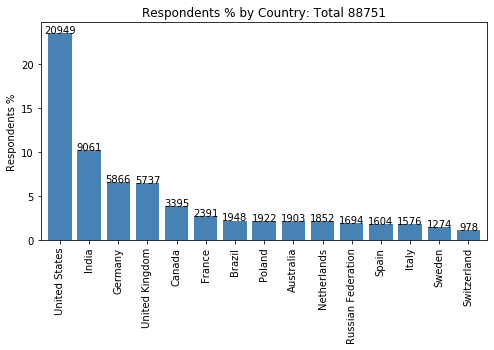

Total respondents in the USA 20949
Total respondents in EU 24819


88751

In [10]:
countries_vals = df.Country.value_counts()
countries_vals_percentage = (countries_vals[:15] * 100 / df.Country.dropna().shape[0])
# colors_list = ['#5cb85c','#5bc0de','#d9534f']
# ax = countries_vals_percentage.plot(kind="bar", color = colors_list)

ax = countries_vals_percentage.plot(kind="bar", figsize=(8,4),
                                    width = 0.8, edgecolor=None, color="steelblue")
plt.ylabel("Respondents %")
plt.title("Respondents % by Country: Total {}".format(df.Country.dropna().shape[0]));
plt.xticks(fontsize=10)

nb_respondents = list(countries_vals[:15])
utils.display_values_above_bars(ax, nb_respondents)
plt.show()
df_eu_respondents = df[df.Country.isin(eu_countries.x)]
df_eu_respondents.Country.unique()
total_eu_respondents = df_eu_respondents.Country.shape[0]
print("Total respondents in the USA", countries_vals["United States"])
print("Total respondents in EU", total_eu_respondents)
# sanity check
df.Country.value_counts().sum()

## Number of survey respondents from the EU coutries

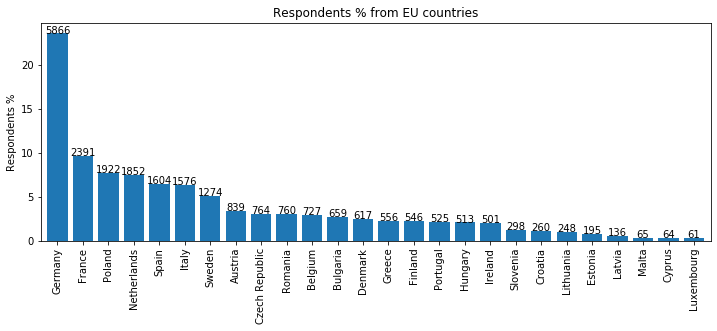

In [11]:
ax_eu = (df_eu_respondents.Country.value_counts() * 100 / df_eu_respondents.Country.dropna().shape[0]).plot(
    kind="bar", figsize=(12,4),
    width = 0.8, edgecolor=None);
# plt.axhline(y=0.05,color='gray',linestyle='--')
# plt.axhline(y=0.1,color='gray',linestyle='--')
plt.ylabel("Respondents %")
plt.title("Respondents % from EU countries");
utils.display_values_above_bars(ax_eu, list(df_eu_respondents.Country.value_counts()))
plt.show()

# LanguageWorkedWith

In [12]:
df.LanguageWorkedWith.head()

0                HTML/CSS;Java;JavaScript;Python
1                            C++;HTML/CSS;Python
2                                       HTML/CSS
3                            C;C++;C#;Python;SQL
4    C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA
Name: LanguageWorkedWith, dtype: object

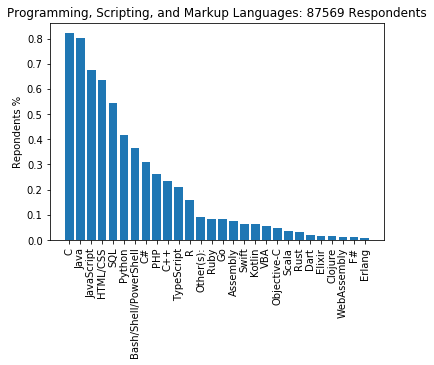

In [13]:
languages = df['LanguageWorkedWith'].dropna().apply(lambda row: str(row).split(';')).explode().unique()

languages_worked_with = df['LanguageWorkedWith'].dropna()
language_responses = languages_worked_with.count()

languages_perc = {}
languages_count = {}
for language in languages:
    languages_perc[language] = df["LanguageWorkedWith"].str.contains(
        language, regex=False, na=False).sum() / languages_worked_with.shape[0]
    languages_count[language] = df["LanguageWorkedWith"].str.contains(
        language, regex=False, na=False).sum()
languages_perc = utils.sort_dict_by_vals(languages_perc)
languages_count = utils.sort_dict_by_vals(languages_count)

plt.title("Programming, Scripting, and Markup Languages: {} Respondents".format(df["LanguageWorkedWith"].dropna().shape[0]))
plt.xticks(rotation='vertical')
plt.ylabel("Repondents %")
plt.bar(languages_perc.keys(), languages_perc.values(), width=0.8, edgecolor=None);

# Developer Type: Which of the following describe you?

In [14]:
devtypes = df['DevType'].dropna()
devtypes

1        Developer, desktop or enterprise applications;...
2        Designer;Developer, back-end;Developer, front-...
3                                    Developer, full-stack
4        Academic researcher;Developer, desktop or ente...
5        Data or business analyst;Data scientist or mac...
                               ...                        
88871                                              Student
88872    Academic researcher;Designer;Developer, game o...
88875                                  Academic researcher
88876    Designer;Developer, front-end;Developer, full-...
88877    Developer, back-end;Developer, desktop or ente...
Name: DevType, Length: 81335, dtype: object

In [15]:
devtypes_list = devtypes.apply(lambda row: str(row).split(';')).explode().unique()
print("DevTypes list", devtypes_list)

DevTypes list ['Developer, desktop or enterprise applications' 'Developer, front-end'
 'Designer' 'Developer, back-end' 'Developer, full-stack'
 'Academic researcher' 'Developer, mobile' 'Data or business analyst'
 'Data scientist or machine learning specialist' 'Database administrator'
 'Engineer, data' 'Engineer, site reliability' 'Developer, QA or test'
 'DevOps specialist' 'Developer, game or graphics' 'Educator' 'Student'
 'Engineering manager' 'Senior executive/VP' 'System administrator'
 'Developer, embedded applications or devices' 'Product manager'
 'Scientist' 'Marketing or sales professional']


In [16]:
not_na_devtypes = df['DevType'].dropna()
not_na_devtypes

1        Developer, desktop or enterprise applications;...
2        Designer;Developer, back-end;Developer, front-...
3                                    Developer, full-stack
4        Academic researcher;Developer, desktop or ente...
5        Data or business analyst;Data scientist or mac...
                               ...                        
88871                                              Student
88872    Academic researcher;Designer;Developer, game o...
88875                                  Academic researcher
88876    Designer;Developer, front-end;Developer, full-...
88877    Developer, back-end;Developer, desktop or ente...
Name: DevType, Length: 81335, dtype: object

In [17]:
devtypes_list = not_na_devtypes.apply(lambda row: str(row).split(';')).explode().unique()
print("DevTypes list", devtypes_list)

DevTypes list ['Developer, desktop or enterprise applications' 'Developer, front-end'
 'Designer' 'Developer, back-end' 'Developer, full-stack'
 'Academic researcher' 'Developer, mobile' 'Data or business analyst'
 'Data scientist or machine learning specialist' 'Database administrator'
 'Engineer, data' 'Engineer, site reliability' 'Developer, QA or test'
 'DevOps specialist' 'Developer, game or graphics' 'Educator' 'Student'
 'Engineering manager' 'Senior executive/VP' 'System administrator'
 'Developer, embedded applications or devices' 'Product manager'
 'Scientist' 'Marketing or sales professional']


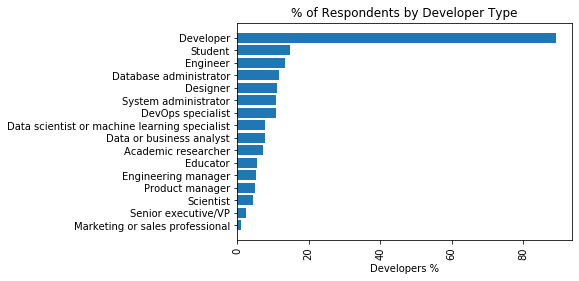


Number of respondents:  81335

Dev Types: {'Marketing or sales professional': 975, 'Senior executive/VP': 2107, 'Scientist': 3617, 'Product manager': 4032, 'Engineering manager': 4202, 'Educator': 4492, 'Academic researcher': 5930, 'Data or business analyst': 6294, 'Data scientist or machine learning specialist': 6460, 'DevOps specialist': 8862, 'System administrator': 8929, 'Designer': 9182, 'Database administrator': 9520, 'Engineer': 10975, 'Student': 11921, 'Developer': 72491}


In [18]:
# Get the developer type without the environment (after the comma e.g. Developer, desktop or enterprise applications)
devtypes = set(dev.split(',')[0].strip() for dev in devtypes_list)
devtype_count, devtype_perc = utils.count_substr_in_column(df, "DevType", devtypes, False)
plt.xticks(rotation='vertical')
plt.xlabel("Developers %")
plt.title("% of Respondents by Developer Type")
y_pos = np.arange(len(devtype_perc))
ax_devs = plt.barh(y_pos, devtype_perc.values());
plt.yticks(y_pos, devtype_perc.keys())
plt.show()
print("\nNumber of respondents: ", df["DevType"].dropna().shape[0])
print("\nDev Types:", devtype_count)
top8_devtypes = list(devtype_perc.keys())[:8]

# Developers perception of the OSS quality

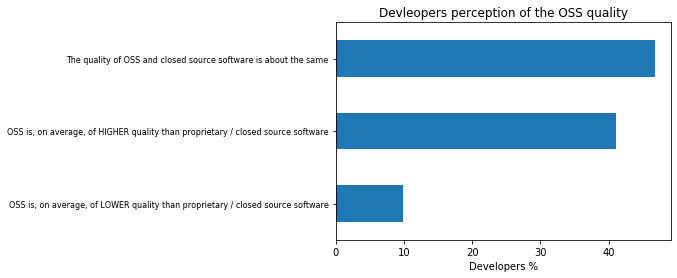

In [19]:
os_perception = (df.OpenSource.value_counts() * 100 / df.OpenSource.shape[0]).sort_values()
os_perception.plot(kind="barh");
plt.title("Devleopers perception of the OSS quality")
plt.xlabel("Developers %")
plt.yticks(rotation=0, size=8)
plt.get("Developers %");

# OpenSource contribution: 
The column OpenSource doesn't contain any missing value. All Respondents answered the corresponding question:
How often do you contribute to open source?

# 3. Evaluating results and sharing insights

# <font color='red'>Question 1</font>
 <font color='red'> How often do developers contribute to OpenSource Software?  </font>

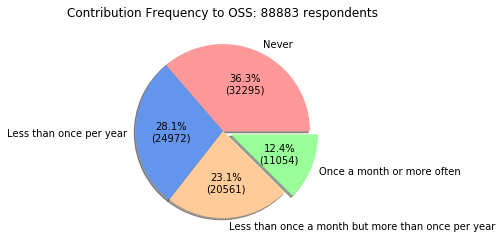

In [20]:
nb_opnesourcers = df.OpenSourcer.count()
opensourcers_count = df.OpenSourcer.value_counts()
colors = ['#ff9999','cornflowerblue','#ffcc99', '#99ff99']
utils.plot_and_show_pie(opensourcers_count.index, opensourcers_count.values,
                        "Contribution Frequency to OSS: {} respondents".format(df.Respondent.count()), 3, colors=colors);

In [21]:
df.OpenSourcer.replace({
    "Less than once a month but more than once per year": "Less than once a month\nbut more than once per year"},
    inplace=True)
df.OpenSourcer.value_counts() * 100 / df.shape[0]

Never                                                  36.334282
Less than once per year                                28.095361
Less than once a month\nbut more than once per year    23.132658
Once a month or more often                             12.437699
Name: OpenSourcer, dtype: float64

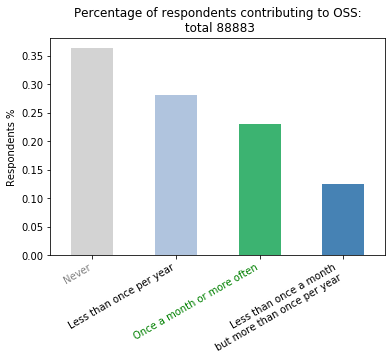

In [22]:
colors_list = ['lightgray', 'lightsteelblue', 'mediumseagreen', 'steelblue', 'cornflowerblue', 'cornflowerblue']
ax_oss_contributors = (df.OpenSourcer.value_counts() / df.shape[0]).plot(
    kind="bar",
    edgecolor=None, figsize=(6,4), color=colors_list);
plt.ylabel("Respondents %")
plt.xticks(rotation=30, ha="right")
ax_oss_contributors.set_xticklabels(list(df.OpenSourcer.unique()))
plt.title("Percentage of respondents contributing to OSS:\n total {}".format(df.OpenSourcer.value_counts().sum()));
utils.display_values_above_bars(ax_eu, list(df.OpenSourcer.value_counts()))
ax_oss_contributors.get_xticklabels()[2].set_color("green")
ax_oss_contributors.get_xticklabels()[0].set_color("gray")
plt.show()

# <font color='red'>Question 2 </font>
 <font color='red'> Do Hobbyist developers contribute more often to Open Source projects?</font>

In [23]:
df.Hobbyist.unique()

array(['Yes', 'No'], dtype=object)

In [24]:
df[df.OpenSourcer == "Never"].groupby("Hobbyist")["Respondent"].count()

Hobbyist
No      9564
Yes    22731
Name: Respondent, dtype: int64

In [25]:
hobbyist_opensourcer = df.filter(["Respondent", "OpenSourcer", "Hobbyist"], axis=1).groupby(['OpenSourcer', 'Hobbyist']).count()
hobbyist_opensourcer

Respondent
OpenSourcer                                        Hobbyist            
Less than once a month\nbut more than once per ... No              2346
                                                   Yes            18215
Less than once per year                            No              4586
                                                   Yes            20386
Never                                              No              9564
                                                   Yes            22731
Once a month or more often                         No              1130
                                                   Yes             9925

In [26]:
hobbyist_opensourcer = hobbyist_opensourcer.reset_index()
hobbyist_opensourcer

,OpenSourcer,Hobbyist,Respondent
0,Less than once a month\nbut more than once per...,No,2346
1,Less than once a month\nbut more than once per...,Yes,18215
2,Less than once per year,No,4586
3,Less than once per year,Yes,20386
4,Never,No,9564
5,Never,Yes,22731
6,Once a month or more often,No,1130
7,Once a month or more often,Yes,9925


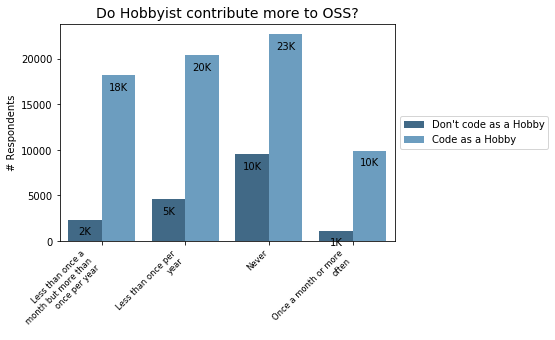

In [27]:
hobbyist_opensourcer['Hobbyist'].replace({"No": "Don't code as a Hobby",
                                "Yes": "Code as a Hobby"}, inplace=True)
splot = utils.plot_grouped_bars(hobbyist_opensourcer, "OpenSourcer", "Hobbyist", "Respondent",
                  title="Do Hobbyist contribute more to OSS?",
                        xlabel="", ylabel="# Respondents");
splot.legend(loc='center left', bbox_to_anchor=(1.00, 0.5), ncol=1);

# <font color='red'>Question 3</font>
<font color='red'>Does OSS quality perception play a bias role towards OSS contribution</font>

In [28]:
group_oss_quality_hobbyist = df[df.Hobbyist == 'Yes'].filter(["Respondent", "OpenSourcer", "OpenSource"], axis=1).groupby(['OpenSourcer', 'OpenSource']).count()
group_oss_quality_hobbyist

Respondent
OpenSourcer                                        OpenSource                                                    
Less than once a month\nbut more than once per ... OSS is, on average, of HIGHER quality than prop...        8355
                                                   OSS is, on average, of LOWER quality than propr...        1505
                                                   The quality of OSS and closed source software i...        8136
Less than once per year                            OSS is, on average, of HIGHER quality than prop...        8437
                                                   OSS is, on average, of LOWER quality than propr...        1867
                                                   The quality of OSS and closed source software i...        9776
Never                                              OSS is, on average, of HIGHER quality than prop...        8259
                                                   OSS is, on average, of LOWER quality than propr...        2542
                                                   The quality of OSS and closed source software i...       11115
Once a month or more often                         OSS is, on average, of HIGHER quality than prop...        5272
                                                   OSS is, on average, of LOWER quality than propr...         727
                                                   The quality of OSS and closed source software i...        3782

In [29]:
group_oss_quality_nothobbyist = df[df.Hobbyist == 'No'].filter(["Respondent", "OpenSourcer", "OpenSource"], axis=1).groupby(['OpenSourcer', 'OpenSource']).count()
oss_quality_perception_groups = [group_oss_quality_hobbyist, group_oss_quality_nothobbyist]
group_oss_quality_nothobbyist

Respondent
OpenSourcer                                        OpenSource                                                    
Less than once a month\nbut more than once per ... OSS is, on average, of HIGHER quality than prop...        1000
                                                   OSS is, on average, of LOWER quality than propr...         252
                                                   The quality of OSS and closed source software i...        1045
Less than once per year                            OSS is, on average, of HIGHER quality than prop...        1692
                                                   OSS is, on average, of LOWER quality than propr...         500
                                                   The quality of OSS and closed source software i...        2300
Never                                              OSS is, on average, of HIGHER quality than prop...        3026
                                                   OSS is, on average, of LOWER quality than propr...        1217
                                                   The quality of OSS and closed source software i...        4931
Once a month or more often                         OSS is, on average, of HIGHER quality than prop...         515
                                                   OSS is, on average, of LOWER quality than propr...         149
                                                   The quality of OSS and closed source software i...         442

In [30]:
group_oss_quality_hobbyist = group_oss_quality_hobbyist.reset_index()
group_oss_quality_nothobbyist = group_oss_quality_nothobbyist.reset_index()

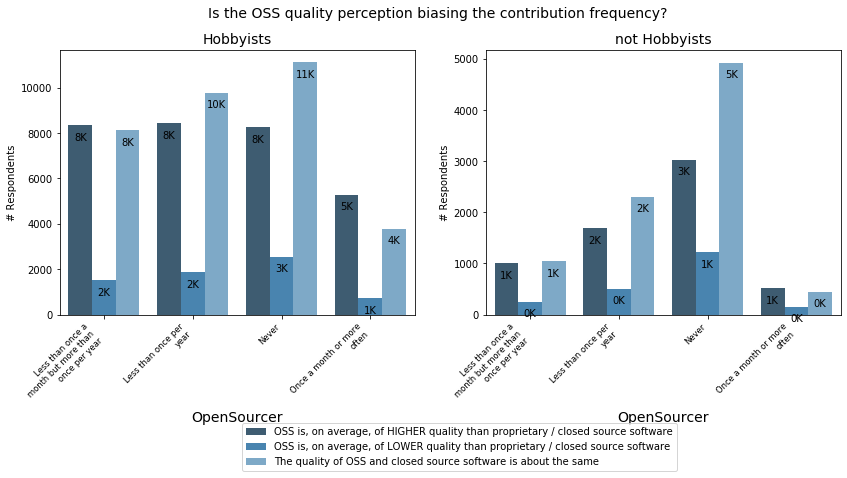

In [31]:
nr_rows = 1
nr_cols = 2

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*7,nr_rows*5), squeeze=False, sharex=False)


splot1 = utils.plot_grouped_bars(group_oss_quality_hobbyist, "OpenSourcer", "OpenSource", "Respondent",
                                 ylabel="# Respondents", ax=axs[0][0], title="Hobbyists", legend=False);
splot2 = utils.plot_grouped_bars(group_oss_quality_nothobbyist, "OpenSourcer", "OpenSource", "Respondent",
                                 ylabel="# Respondents", ax=axs[0][1], title="not Hobbyists", legend=False);

plt.suptitle('Is the OSS quality perception biasing the contribution frequency?', size=14)
plt.legend(loc='center left', bbox_to_anchor=(-0.7, -0.5), ncol=1);
plt.subplots_adjust(top=.86)
plt.show()

# <font color='red'>Question </font>
<font color='red'>Does the number of years of experience influence the opensource contribution frequency?</font>

# Coding Years of experience including Education

In [32]:
# Check the years of experience unique values
df.YearsCodePro.unique()

array([nan, '1', 'Less than 1 year', '9', '3', '4', '10', '8', '2', '13',
       '18', '5', '14', '22', '23', '19', '35', '20', '25', '7', '15',
       '27', '6', '48', '12', '31', '11', '17', '16', '21', '29', '30',
       '26', '33', '28', '37', '40', '34', '24', '39', '38', '36', '32',
       '41', '45', '43', 'More than 50 years', '44', '42', '46', '49',
       '50', '47'], dtype=object)

### Map string values of YearsCodePro to numbers to use later for years of experience groups

In [33]:
value_map = {'Less than 1 year': '0', 'More than 50 years': '51'}

def mapper(val):
    """
    Mapping a string value to an int
    :param val(string) value to map
    """
    return  int(value_map.get(val, val))

df['YearsCodeProCleaned'] = df['YearsCodePro'].dropna().apply(mapper)
df.YearsCodeProCleaned.unique()

array([nan,  1.,  0.,  9.,  3.,  4., 10.,  8.,  2., 13., 18.,  5., 14.,
       22., 23., 19., 35., 20., 25.,  7., 15., 27.,  6., 48., 12., 31.,
       11., 17., 16., 21., 29., 30., 26., 33., 28., 37., 40., 34., 24.,
       39., 38., 36., 32., 41., 45., 43., 51., 44., 42., 46., 49., 50.,
       47.])

### Create years of experience ranges

In [34]:
tmp = [0, 5, 10, 20, 40, 55]
ranges = list(zip(tmp, tmp[1:]))
ranges
def in_the_range(ranges_):
    """
    Map value to a range if it is inside it
    """
    def f(x):
        i = 0
        while i < len(ranges_):
            r = ranges[i]
            if (x >= r[0]) and (x < r[1]):
                if r[0] == 40:
                    return  '>40'
                else:
                    return f'{r[0]} - {r[1]}'
            i += 1
        return f'>{r[1]}'
    return f

In [35]:
df['Years of experience'] = (df['YearsCodeProCleaned'].dropna()).apply(in_the_range(ranges))
df['Years of experience']

0           NaN
1           NaN
2         0 - 5
3         0 - 5
4        5 - 10
          ...  
88878       NaN
88879       NaN
88880       NaN
88881       NaN
88882     0 - 5
Name: Years of experience, Length: 88883, dtype: object

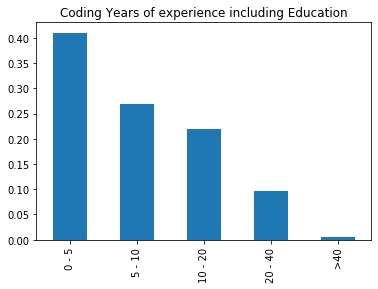

In [36]:
(df['Years of experience'].value_counts()/ df["Years of experience"].count()).plot(
    kind="bar", title="Coding Years of experience including Education");

### Group the respondents by Years of Experience ranges and OSS contribution frequency

In [37]:
# df.loc[df['YearsCodeProCleaned'] < 5, 'YearsCodeProCleaned'] = "<5"
opensourcers_by_age = df.filter(["Respondent", "OpenSourcer", "Years of experience"], axis=1).\
    groupby(["Years of experience", "OpenSourcer"]).count()
opensourcers_by_age

Respondent
Years of experience OpenSourcer                                                   
0 - 5               Less than once a month\nbut more than once per ...        6428
                    Less than once per year                                   8329
                    Never                                                    12508
                    Once a month or more often                                3239
10 - 20             Less than once a month\nbut more than once per ...        4327
                    Less than once per year                                   5090
                    Never                                                     4660
                    Once a month or more often                                2186
20 - 40             Less than once a month\nbut more than once per ...        1749
                    Less than once per year                                   2247
                    Never                                                     2183
                    Once a month or more often                                1018
5 - 10              Less than once a month\nbut more than once per ...        5331
                    Less than once per year                                   6045
                    Never                                                     6194
                    Once a month or more often                                2454
>40                 Less than once a month\nbut more than once per ...          64
                    Less than once per year                                    109
                    Never                                                      122
                    Once a month or more often                                  48

In [38]:
opensourcers_by_age = opensourcers_by_age.reset_index()

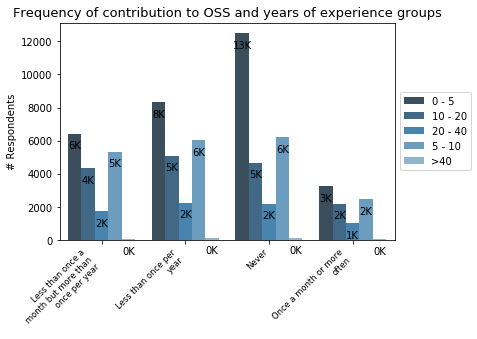

In [39]:
splot = utils.plot_grouped_bars(opensourcers_by_age, "OpenSourcer", "Years of experience", "Respondent",
                        xlabel="", ylabel="# Respondents");
plt.title("Frequency of contribution to OSS and years of experience groups", size=13,
          fontweight='light')
splot.legend(loc='center left', bbox_to_anchor=(1.00, 0.5), ncol=1);
plt.show()

# <font color='red'>Question 5</font>
<font color='red'>Do developers contributing to the OSS have a higher income? </font>

In [40]:
# Summarize the central tendency, dispersion and shape of the dataset’s distribution, excluding NaN values.
df.CompTotal.describe()

count    5.594500e+04
mean     5.519014e+11
std      7.331926e+13
min      0.000000e+00
25%      2.000000e+04
50%      6.200000e+04
75%      1.200000e+05
max      1.000000e+16
Name: CompTotal, dtype: float64

In [41]:
median_salaries = np.median(df.CompTotal.dropna().values)
median_salaries

62000.0

In [42]:
# Kurtosis to measure whether the distribution is too peaked.
df.kurtosis(axis = 0, skipna = True)

Respondent                -1.200000
CompTotal              18551.717402
ConvertedComp             26.195623
WorkWeekHrs             8272.445241
CodeRevHrs                70.322650
Age                        3.127265
YearsCodeProCleaned        3.309610
dtype: float64

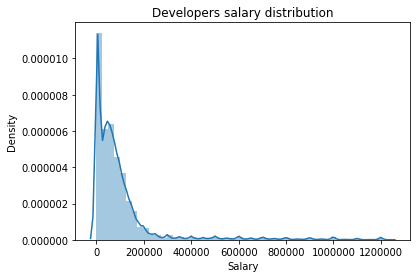

In [43]:
# Outliers are massively skewing the data. Removing them to get a better interpretation of the remaining data
sns.distplot(df.query('CompTotal<{}'.format(median_salaries*20)).CompTotal.dropna()) #, bins=10000);
plt.xlabel("Salary")
plt.ylabel("Density")
plt.title("Developers salary distribution");

In [44]:
salary_data = df.filter(["Respondent", "OpenSourcer", "Hobbyist" , "CompTotal"], axis=1)
salary_data = salary_data[salary_data.CompTotal < median_salaries * 20]
salary_data.shape[0]

53533

In [45]:
# Number of Data points with salary outliers
df.CompTotal.count()

55945

In [46]:
# Number of Salary Data points without outliers
(df.CompTotal.dropna().values < median_salaries * 20).sum()

53533

In [47]:
salary_data = salary_data.groupby(['OpenSourcer']).agg(CompTotal =("CompTotal",'mean'))
#  data.groupby(['OpenSourcer', 'Hobbyist']).agg(mean_salary =("CompTotal",'mean'))
# groupby('StationID', as_index=False)['BiasTemp'].mean()
salary_data["mean_salary_formatted"] = salary_data["CompTotal"].apply(lambda x: '{:,.2f}'.format(x)).values.tolist()
salary_data = salary_data.reset_index()
# salary_data['Hobbyist'].replace({"No": "Don't code as a Hobby",
#                                 "Yes": "Code as a Hobby"}, inplace=True)

salary_data

,OpenSourcer,CompTotal,mean_salary_formatted
0,Less than once a month\nbut more than once per...,105824.852658,"105,824.85"
1,Less than once per year,99803.203081,"99,803.20"
2,Never,93806.636620,"93,806.64"
3,Once a month or more often,115656.535993,"115,656.54"


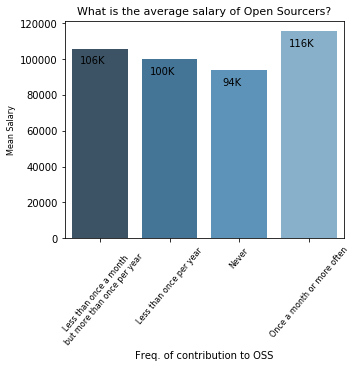

In [48]:
plt.figure(figsize=(5, 4))
splot = sns.barplot(x="OpenSourcer", y="CompTotal",
                      data=salary_data,  palette="Blues_d", capsize=0.1)
# utils.plot_grouped_bars(salary_data, "OpenSourcer", "Hobbyist", "CompTotal",
#                   title="What is the average salary of Open Sourcers?",
#                         xlabel="", ylabel="# Respondents")
# splot.legend(loc='center left', bbox_to_anchor=(1.00, 0.5), ncol=1);
plt.ylabel("Mean Salary", size=8, fontweight='light')
plt.xlabel("Freq. of contribution to OSS")
plt.xticks(rotation=50, size=8)
# plt.tight_layout()
plt.title("What is the average salary of Open Sourcers?",
          size=11, fontweight='light')

for p in splot.patches:
    splot.annotate(format(round(p.get_height() / 1000), '.0f') + "K", (p.get_x()+0.3, p.get_height()),
        ha='center', va='center', 
        size=10, xytext=(0, -12),
        textcoords='offset points', color='black')
plt.show()